In [2]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf


  Using cached tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata (3.5 kB)
     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     ---------------------------------------- 46.2/46.2 kB ? eta 0:00:00
   ---------------------------------------- 0.0/377.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/377.0 MB 30.4 MB/s eta 0:00:13
   ---------------------------------------- 1.5/377.0 MB 23.9 MB/s eta 0:00:16
   ---------------------------------------- 1.5/377.0 MB 23.9 MB/s eta 0:00:16
   ---------------------------------------- 1.5/377.0 MB 23.9 MB/s eta 0:00:16
   ---------------------------------------- 1.5/377.0 MB 23.9 MB/s eta 0:00:16
   ---------------------------------------- 1.5/377.0 MB 23.9 MB/s eta 0:00:16
   ---------------------------------------- 1.5/377.0 MB 23.9 MB/s eta 0:00:16
   ---------------------------------------- 1.5/377.0 MB 23.9 MB/s eta 0:00:16
   ---------------------------------------- 1.6/377.0 MB 4.1 MB/s eta 0:01

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
df.tail()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


In [6]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [7]:
df[df.columns[2:]]

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
159566,0,0,0,0,0,0
159567,0,0,0,0,0,0
159568,0,0,0,0,0,0
159569,0,0,0,0,0,0


In [8]:
df[df.columns[2:]].iloc[6]

toxic            1
severe_toxic     1
obscene          1
threat           0
insult           1
identity_hate    0
Name: 6, dtype: int64

In [9]:
df[df['toxic']==1]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0
...,...,...,...,...,...,...,...,...
159494,fef4cf7ba0012866,"""\n\n our previous conversation \n\nyou fuckin...",1,0,1,0,1,1
159514,ff39a2895fc3b40e,YOU ARE A MISCHIEVIOUS PUBIC HAIR,1,0,0,0,1,0
159541,ffa33d3122b599d6,Your absurd edits \n\nYour absurd edits on gre...,1,0,1,0,1,0
159546,ffb47123b2d82762,"""\n\nHey listen don't you ever!!!! Delete my e...",1,0,0,0,1,0


In [10]:
df.iloc[6]['comment_text']

'COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK'

In [11]:
from tensorflow.keras.layers import TextVectorization       #text features into intger

In [12]:
X = df['comment_text']
y = df[df.columns[2:]].values

In [13]:
X.head()

0    Explanation\nWhy the edits made under my usern...
1    D'aww! He matches this background colour I'm s...
2    Hey man, I'm really not trying to edit war. It...
3    "\nMore\nI can't make any real suggestions on ...
4    You, sir, are my hero. Any chance you remember...
Name: comment_text, dtype: object

In [14]:
y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [16]:
# !pip list

In [17]:
# Should be high but can't afford that much computation
MAX_FEATURES = 100000

In [18]:
vectorizer = TextVectorization(max_tokens = MAX_FEATURES, 
                              output_sequence_length = 1000, 
                              output_mode = 'int')

In [19]:
vectorizer.adapt(X.values)  #conver all text into int

In [20]:
vectorizer.get_vocabulary()

['',
 '[UNK]',
 'the',
 'to',
 'of',
 'and',
 'a',
 'you',
 'i',
 'is',
 'that',
 'in',
 'it',
 'for',
 'this',
 'not',
 'on',
 'be',
 'as',
 'have',
 'are',
 'your',
 'with',
 'if',
 'article',
 'was',
 'or',
 'but',
 'page',
 'my',
 'an',
 'from',
 'by',
 'do',
 'at',
 'about',
 'me',
 'so',
 'wikipedia',
 'can',
 'what',
 'there',
 'all',
 'has',
 'will',
 'talk',
 'please',
 'would',
 'its',
 'no',
 'one',
 'just',
 'like',
 'they',
 'he',
 'dont',
 'which',
 'any',
 'been',
 'should',
 'more',
 'we',
 'some',
 'other',
 'who',
 'see',
 'here',
 'also',
 'his',
 'think',
 'im',
 'because',
 'know',
 'how',
 'am',
 'people',
 'why',
 'edit',
 'articles',
 'only',
 'out',
 'up',
 'when',
 'were',
 'use',
 'then',
 'may',
 'time',
 'did',
 'them',
 'now',
 'being',
 'their',
 'than',
 'thanks',
 'even',
 'get',
 'make',
 'good',
 'had',
 'very',
 'information',
 'does',
 'could',
 'well',
 'want',
 'such',
 'sources',
 'way',
 'name',
 'these',
 'deletion',
 'pages',
 'first',
 'help'

In [21]:
#It had removed punctuation by default(standardize = 'lower_and_strip_punctuation')
TextVectorization??

Init signature:
TextVectorization(
    max_tokens=None,
    standardize='lower_and_strip_punctuation',
    split='whitespace',
    ngrams=None,
    output_mode='int',
    output_sequence_length=None,
    pad_to_max_tokens=False,
    vocabulary=None,
    idf_weights=None,
    sparse=False,
    ragged=False,
    encoding='utf-8',
    name=None,
    **kwargs,
)
Source:        
@keras_export("keras.layers.TextVectorization")
class TextVectorization(Layer):
    """A preprocessing layer which maps text features to integer sequences.

    This layer has basic options for managing text in a Keras model. It
    transforms a batch of strings (one example = one string) into either a list
    of token indices (one example = 1D tensor of integer token indices) or a
    dense representation (one example = 1D tensor of float values representing
    data about the example's tokens). This layer is meant to handle natural
    language inputs. To handle simple string inputs (categorical strings or
    pr

In [22]:
#Example
vectorizer('life goes on and on')[:10]
#Five integers for five words 

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([306, 755,  16,   5,  16,   0,   0,   0,   0,   0], dtype=int64)>

In [23]:
#vectorizing all our comments i.e. X.values
vectorized_text = vectorizer(X.values)

In [24]:
vectorized_text

<tf.Tensor: shape=(159571, 1000), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]], dtype=int64)>

In [25]:
X.shape

(159571,)

In [27]:
import tensorflow as tf
ds = tf.data.Dataset.from_tensor_slices((vectorized_text,y))        #created dataset input and target
ds = ds.cache()                                                     #these 4 are pipeline steps
ds = ds.shuffle(160000)
ds = ds.batch(16)                                                   #each represent as sries of 16 sample
ds = ds.prefetch(8)

In [28]:
# tf.data.Dataset.from_tensor_slices is used to get the slices of list or array. eg-
dataset = tf.data.Dataset.from_tensor_slices([[5, 10], [3, 6]]) 
  
for ele in dataset: 
    print(ele.numpy()) 

[ 5 10]
[3 6]


In [29]:
batch_X, batch_y = ds.as_numpy_iterator().next()

In [30]:
batch_X.shape

(16, 1000)

In [31]:
batch_y.shape

(16, 6)

In [32]:
len(ds)

9974

In [33]:
# training data = 70%, validating_data = 20%, testing_data = 10%, 
len(ds)*.7

6981.799999999999

In [34]:
int(len(ds)*.7)

6981

In [35]:
train = ds.take(int(len(ds)*.7)) # taking 70% data from dataset
valid = ds.skip(int(len(ds)*.7)).take(int(len(ds)*.2)) #skipping first 70% training data then taking next 20% data as valid
test = ds.skip(int(len(ds)*.9)).take(int(len(ds)*.1)) 
#skipping first 90% training & valid data then taking next 10% data as test data

In [36]:
len(train)

6981

In [37]:
len(valid)

1994

In [38]:
len(test)

997

In [39]:
train_generator = ds.as_numpy_iterator()

In [42]:
train_generator.next()

(array([[  776,   865,   655, ...,     0,     0,     0],
        [76293,   211,    48, ...,     0,     0,     0],
        [   23,     7,    69, ...,     0,     0,     0],
        ...,
        [  154,  2179,     3, ...,     0,     0,     0],
        [ 1006,     4,   216, ...,     0,     0,     0],
        [ 1347,     1,  1858, ...,     0,     0,     0]], dtype=int64),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]], dtype=int64))

Build deep learning model

In [44]:
from tensorflow.keras.models import Sequential            #fastest and easiest
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense,Embedding

In [45]:
Bidirectional??

Init signature:
Bidirectional(
    layer,
    merge_mode='concat',
    weights=None,
    backward_layer=None,
    **kwargs,
)
Source:        
@keras_export("keras.layers.Bidirectional")
class Bidirectional(Layer):
    """Bidirectional wrapper for RNNs.

    Args:
        layer: `keras.layers.RNN` instance, such as
            `keras.layers.LSTM` or `keras.layers.GRU`.
            It could also be a `keras.layers.Layer` instance
            that meets the following criteria:
            1. Be a sequence-processing layer (accepts 3D+ inputs).
            2. Have a `go_backwards`, `return_sequences` and `return_state`
            attribute (with the same semantics as for the `RNN` class).
            3. Have an `input_spec` attribute.
            4. Implement serialization via `get_config()` and `from_config()`.
            Note that the recommended way to create new RNN layers is to write a
            custom RNN cell and use it with `keras.layers.RNN`, instead of
            subclassing

In [55]:
model = Sequential()   #initiate model and create embedding layer
model.add(Embedding(MAX_FEATURES+1,32))       
model.add(Bidirectional(LSTM(32,activation='tanh'))) #Bidirectional LSTM layer
#gpu acceleration required for lstm needs tanh (so don't use relu) (but I don't have GPU :( )

#Feature Extractors
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
#Output Layer
model.add(Dense(6,activation='sigmoid'))

In [56]:
model.compile(loss='BinaryCrossentropy', optimizer = 'Adam')
#Any of the value can be 1(or 0) so we use binary crossentropy not categoricalentropy,
#it's not that ther could only be one category histor

In [57]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [58]:
history = model.fit(train, epochs = 1, validation_data = valid)

6981/6981 ━━━━━━━━━━━━━━━━━━━━ 2959s 420ms/step - loss: 0.0848 - val_loss: 0.0467


In [59]:
from matplotlib import pyplot as plt

In [60]:
history.history

{'loss': [0.062277838587760925], 'val_loss': [0.04674705117940903]}

<Figure size 1000x500 with 0 Axes>

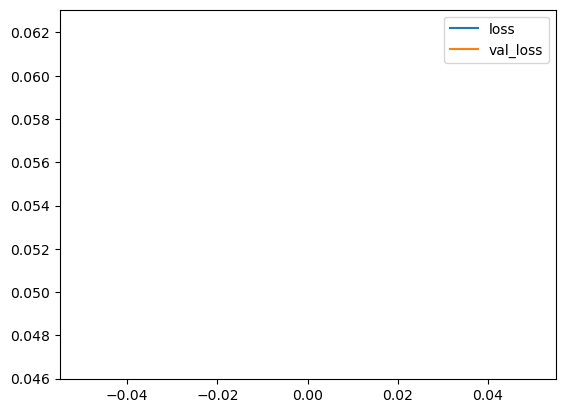

In [61]:
plt.figure(figsize=(10,5))
pd.DataFrame(history.history).plot()
plt.show()

In [62]:
input_text = vectorizer('Fuck off')

In [63]:
input_text

<tf.Tensor: shape=(1000,), dtype=int64, numpy=
array([139, 224,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0, 

In [64]:
np.array([input_text]) # as the predict method expects input in batch

array([[139, 224,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0

In [65]:
# we can also use expand_dims just to make code cleaner(though I don't get how >< )
np.expand_dims(input_text,0) 

array([[139, 224,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0

In [66]:
model.predict(np.expand_dims(input_text,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[0.99320954, 0.3138995 , 0.9532281 , 0.04839801, 0.84414953,
        0.19867788]], dtype=float32)

In [67]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [68]:
pred = model.predict(np.expand_dims(input_text,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


In [69]:
pred

array([[0.99320954, 0.3138995 , 0.9532281 , 0.04839801, 0.84414953,
        0.19867788]], dtype=float32)

In [70]:
#making predictions for test batch
test.as_numpy_iterator().next()

(array([[   68,   109,     9, ...,     0,     0,     0],
        [    8,   253,    48, ...,     0,     0,     0],
        [12562,     2,   245, ...,     0,     0,     0],
        ...,
        [ 2891,  2063,    33, ...,     0,     0,     0],
        [  130,   147,    34, ...,     0,     0,     0],
        [  425,   817,     7, ...,     0,     0,     0]], dtype=int64),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 1, 1, 0, 0, 1],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 0],
        [1, 0, 1, 0, 1, 0]], dtype=int64))

In [71]:
batch = test.as_numpy_iterator().next()
batch

(array([[46831,   908,     1, ...,     0,     0,     0],
        [  358,     7,    88, ...,     0,     0,     0],
        [   49,   121,    13, ...,     0,     0,     0],
        ...,
        [    8,   221,    10, ...,     0,     0,     0],
        [  679,     8,   221, ...,     0,     0,     0],
        [   12,    47,    17, ...,     0,     0,     0]], dtype=int64),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]], dtype=int64))

In [72]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [73]:
model.predict(batch_X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 821ms/step


array([[3.21386833e-05, 1.14784224e-12, 1.27185581e-06, 5.72247671e-08,
        7.50994150e-06, 1.20432702e-07],
       [6.67670742e-04, 1.50322821e-09, 4.48066530e-05, 3.60347804e-06,
        1.74160814e-04, 7.13103145e-06],
       [7.12489535e-04, 2.34053421e-09, 5.39412285e-05, 5.20322237e-06,
        2.09543548e-04, 9.19306785e-06],
       [8.79180245e-03, 5.29816759e-07, 8.35880288e-04, 1.10497007e-04,
        2.55817687e-03, 1.95643181e-04],
       [5.13507512e-05, 3.59692918e-12, 2.21890036e-06, 1.13570621e-07,
        1.23737473e-05, 2.28266174e-07],
       [8.68503819e-04, 3.70410547e-09, 6.82726968e-05, 6.68838402e-06,
        2.56158062e-04, 1.20843488e-05],
       [2.06260913e-04, 1.13619648e-10, 1.21816465e-05, 8.65281720e-07,
        5.58110005e-05, 1.65507481e-06],
       [2.09854654e-04, 1.16299637e-10, 1.23099198e-05, 8.77869184e-07,
        5.64961047e-05, 1.65994652e-06],
       [8.09519028e-04, 3.15242965e-09, 6.30219947e-05, 6.09458766e-06,
        2.38567853e-04, 

In [74]:
batch_pred = model.predict(batch_X)
batch_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


array([[3.21386833e-05, 1.14784224e-12, 1.27185581e-06, 5.72247671e-08,
        7.50994150e-06, 1.20432702e-07],
       [6.67670742e-04, 1.50322821e-09, 4.48066530e-05, 3.60347804e-06,
        1.74160814e-04, 7.13103145e-06],
       [7.12489535e-04, 2.34053421e-09, 5.39412285e-05, 5.20322237e-06,
        2.09543548e-04, 9.19306785e-06],
       [8.79180245e-03, 5.29816759e-07, 8.35880288e-04, 1.10497007e-04,
        2.55817687e-03, 1.95643181e-04],
       [5.13507512e-05, 3.59692918e-12, 2.21890036e-06, 1.13570621e-07,
        1.23737473e-05, 2.28266174e-07],
       [8.68503819e-04, 3.70410547e-09, 6.82726968e-05, 6.68838402e-06,
        2.56158062e-04, 1.20843488e-05],
       [2.06260913e-04, 1.13619648e-10, 1.21816465e-05, 8.65281720e-07,
        5.58110005e-05, 1.65507481e-06],
       [2.09854654e-04, 1.16299637e-10, 1.23099198e-05, 8.77869184e-07,
        5.64961047e-05, 1.65994652e-06],
       [8.09519028e-04, 3.15242965e-09, 6.30219947e-05, 6.09458766e-06,
        2.38567853e-04, 

In [75]:
batch_pred.flatten() # flatten ==> 1D array 

array([3.21386833e-05, 1.14784224e-12, 1.27185581e-06, 5.72247671e-08,
       7.50994150e-06, 1.20432702e-07, 6.67670742e-04, 1.50322821e-09,
       4.48066530e-05, 3.60347804e-06, 1.74160814e-04, 7.13103145e-06,
       7.12489535e-04, 2.34053421e-09, 5.39412285e-05, 5.20322237e-06,
       2.09543548e-04, 9.19306785e-06, 8.79180245e-03, 5.29816759e-07,
       8.35880288e-04, 1.10497007e-04, 2.55817687e-03, 1.95643181e-04,
       5.13507512e-05, 3.59692918e-12, 2.21890036e-06, 1.13570621e-07,
       1.23737473e-05, 2.28266174e-07, 8.68503819e-04, 3.70410547e-09,
       6.82726968e-05, 6.68838402e-06, 2.56158062e-04, 1.20843488e-05,
       2.06260913e-04, 1.13619648e-10, 1.21816465e-05, 8.65281720e-07,
       5.58110005e-05, 1.65507481e-06, 2.09854654e-04, 1.16299637e-10,
       1.23099198e-05, 8.77869184e-07, 5.64961047e-05, 1.65994652e-06,
       8.09519028e-04, 3.15242965e-09, 6.30219947e-05, 6.09458766e-06,
       2.38567853e-04, 1.10238279e-05, 1.18456641e-03, 8.08751643e-09,
      

In [76]:
model.predict(batch_X) > 0.5

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


array([[False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False]])

In [77]:
(model.predict(batch_X) > 0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [78]:
batch_y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [79]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [80]:
precision = Precision()
recall = Recall()
catacc = CategoricalAccuracy()

In [81]:
for batch in test.as_numpy_iterator(): #unpack the batch
    X_test, y_test = batch
    y_pred = model.predict(X_test)  #predict values 
    # flattening y_pred and y_test for comparing
    y_pred = y_pred.flatten()
    y_test = y_test.flatten()
    
    #upadting the metrices
    precision.update_state(y_test,y_pred)
    recall.update_state(y_test,y_pred)
    catacc.update_state(y_test,y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━

In [82]:
print(f'Precision:{precision.result().numpy()},Recall: {recall.result().numpy()},Categorical Accuracy: {catacc.result().numpy()}')

Precision:0.8494983315467834,Recall: 0.5995869040489197,Categorical Accuracy: 0.4613841474056244


In [83]:
!pip install gradio jinja2 --use-deprecated=legacy-resolver

     ---------------------------------------- 0.0/12.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.3 MB ? eta -:--:--
     ---------------------------------------- 0.1/12.3 MB 1.1 MB/s eta 0:00:12
     - -------------------------------------- 0.6/12.3 MB 3.9 MB/s eta 0:00:03
     --- ------------------------------------ 1.0/12.3 MB 5.5 MB/s eta 0:00:03
     ----- ---------------------------------- 1.5/12.3 MB 6.5 MB/s eta 0:00:02
     ------- -------------------------------- 2.2/12.3 MB 7.4 MB/s eta 0:00:02
     -------- ------------------------------- 2.8/12.3 MB 8.0 MB/s eta 0:00:02
     --------- ------------------------------ 3.0/12.3 MB 8.0 MB/s eta 0:00:02
     ---------- ----------------------------- 3.2/12.3 MB 7.9 MB/s eta 0:00:02
     ----------- ---------------------------- 3.5/12.3 MB 7.4 MB/s eta 0:00:02
     ------------ --------------------------- 3.7/12.3 MB 7.1 MB/s eta 0:00:02
     ------------ --------------------------- 3.8/12.3 MB 6.8 MB/s

ERROR: pip's legacy dependency resolver does not consider dependency conflicts when selecting packages. This behaviour is the source of the following dependency conflicts.
anaconda-cloud-auth 0.1.4 requires pydantic<2.0, but you'll have pydantic 2.7.1 which is incompatible.


In [84]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [85]:
pip install gradio

   ---------------------------------------- 0.0/55.4 kB ? eta -:--:--
   ------- -------------------------------- 10.2/55.4 kB ? eta -:--:--
   ------------------------------------ --- 51.2/55.4 kB 871.5 kB/s eta 0:00:01
   ---------------------------------------- 55.4/55.4 kB 961.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/280.1 kB ? eta -:--:--
   --------------------------------- ------ 235.5/280.1 kB 7.3 MB/s eta 0:00:01
   ---------------------------------------- 280.1/280.1 kB 8.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [86]:
import gradio as gr

In [88]:
model.save('toxicity.h5')

In [89]:
model = tf.keras.models.load_model('toxicity.h5')

In [90]:
input_text = vectorizer("I am gonna kill you")

In [91]:
result = model.predict(np.expand_dims(input_text,0))
result

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 644ms/step


array([[0.79492235, 0.01774702, 0.34797153, 0.02423172, 0.3448176 ,
        0.06087893]], dtype=float32)

In [92]:
input_text2 = vectorizer("I am gonna marry you")

In [93]:
result = model.predict(np.expand_dims(input_text2,0))
result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


array([[0.18067442, 0.00045197, 0.02560243, 0.00558655, 0.05958487,
        0.00788784]], dtype=float32)

In [94]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])    #convert text into num
    result = model.predict(vectorized_comment)    #predict result
    
    text = ''
    for idx,col in enumerate(df.columns[2:]):
        text += '{}:{}\n'.format(col, result[0][idx]>0.5)
    return text

In [95]:
interface = gr.Interface(fn=score_comment,
                         inputs=gr.Textbox(lines=2,placeholder='Comment to know score'),
                        outputs = "text")

In [96]:
interface.launch(share=True)

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://e6a110ee901cfa3d6e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
